# Naive Bayes

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv('diabetes2.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##**Checking if columns contain 0 values or not.**

In [8]:
print(dataset[dataset['Glucose']==0].shape[0])
print(dataset[dataset['BloodPressure']==0].shape[0])
print(dataset[dataset['SkinThickness']==0].shape[0])
print(dataset[dataset['Insulin']==0].shape[0])
print(dataset[dataset['BMI']==0].shape[0])

5
35
227
374
11


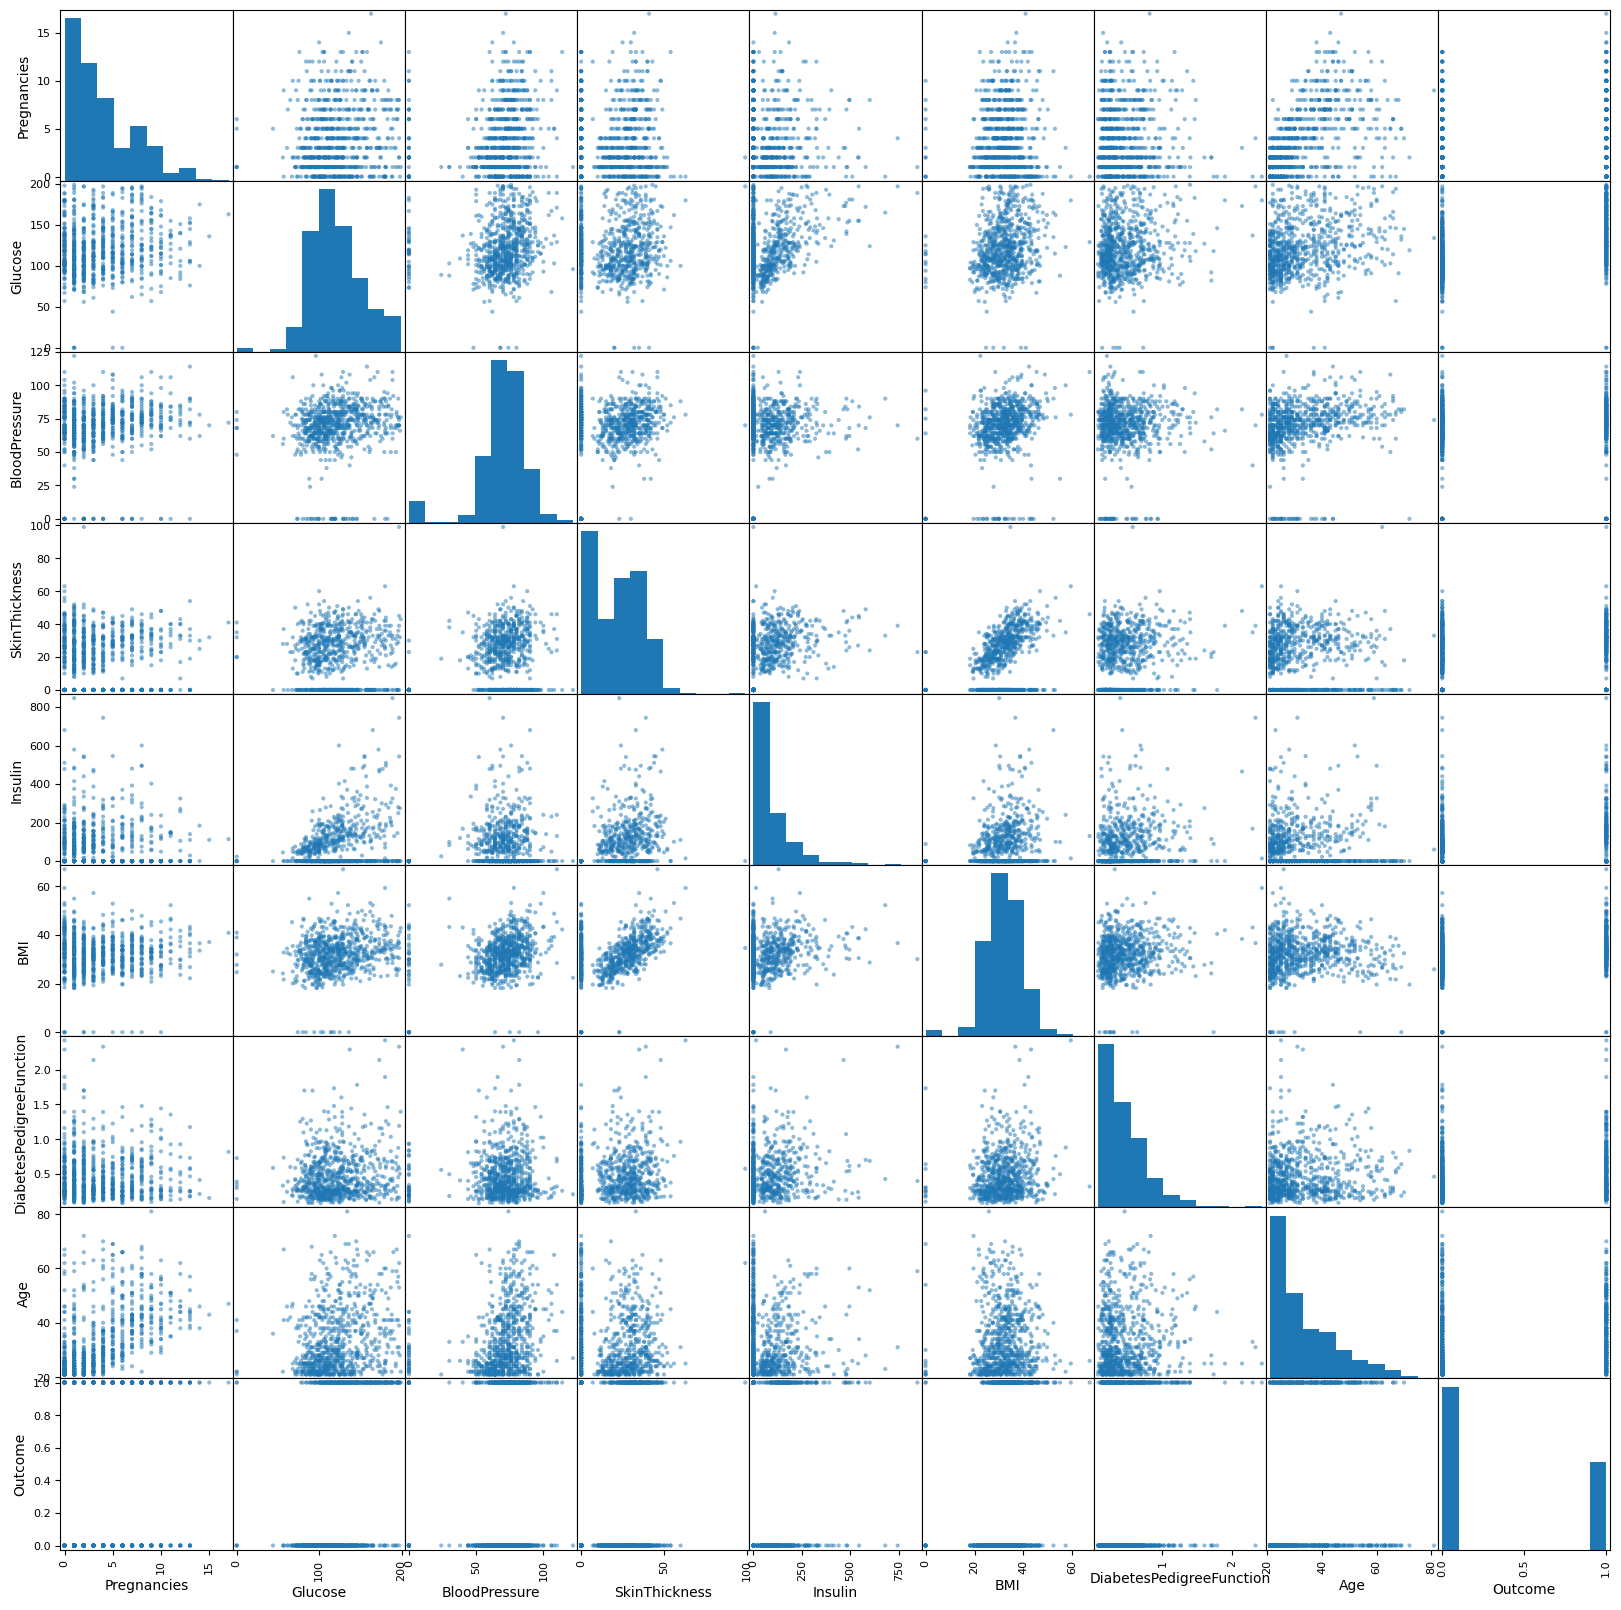

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset,figsize=(20,20));

##**Replacing the 0 Values with their respective mean and median**

In [10]:
dataset['Glucose']=dataset['Glucose'].replace(0,dataset['Glucose'].mean())#normal distribution
dataset['BloodPressure']=dataset['BloodPressure'].replace(0,dataset['BloodPressure'].mean())#normal Distribution
dataset['SkinThickness']=dataset['SkinThickness'].replace(0,dataset['SkinThickness'].median())#skewed distribution
dataset['Insulin']=dataset['Insulin'].replace(0,dataset['Insulin'].median()) #Skewed Distribution
dataset['BMI']=dataset['BMI'].replace(0,dataset['BMI'].median()) #Skewed Distribution

In [11]:
print(dataset[dataset['Glucose']==0].shape[0])
print(dataset[dataset['BloodPressure']==0].shape[0])
print(dataset[dataset['SkinThickness']==0].shape[0])
print(dataset[dataset['Insulin']==0].shape[0])
print(dataset[dataset['BMI']==0].shape[0])

0
0
0
0
0


array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>,
        <Axes: xlabel='Outcome', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>,
        <Axes: xlabel='Outcom

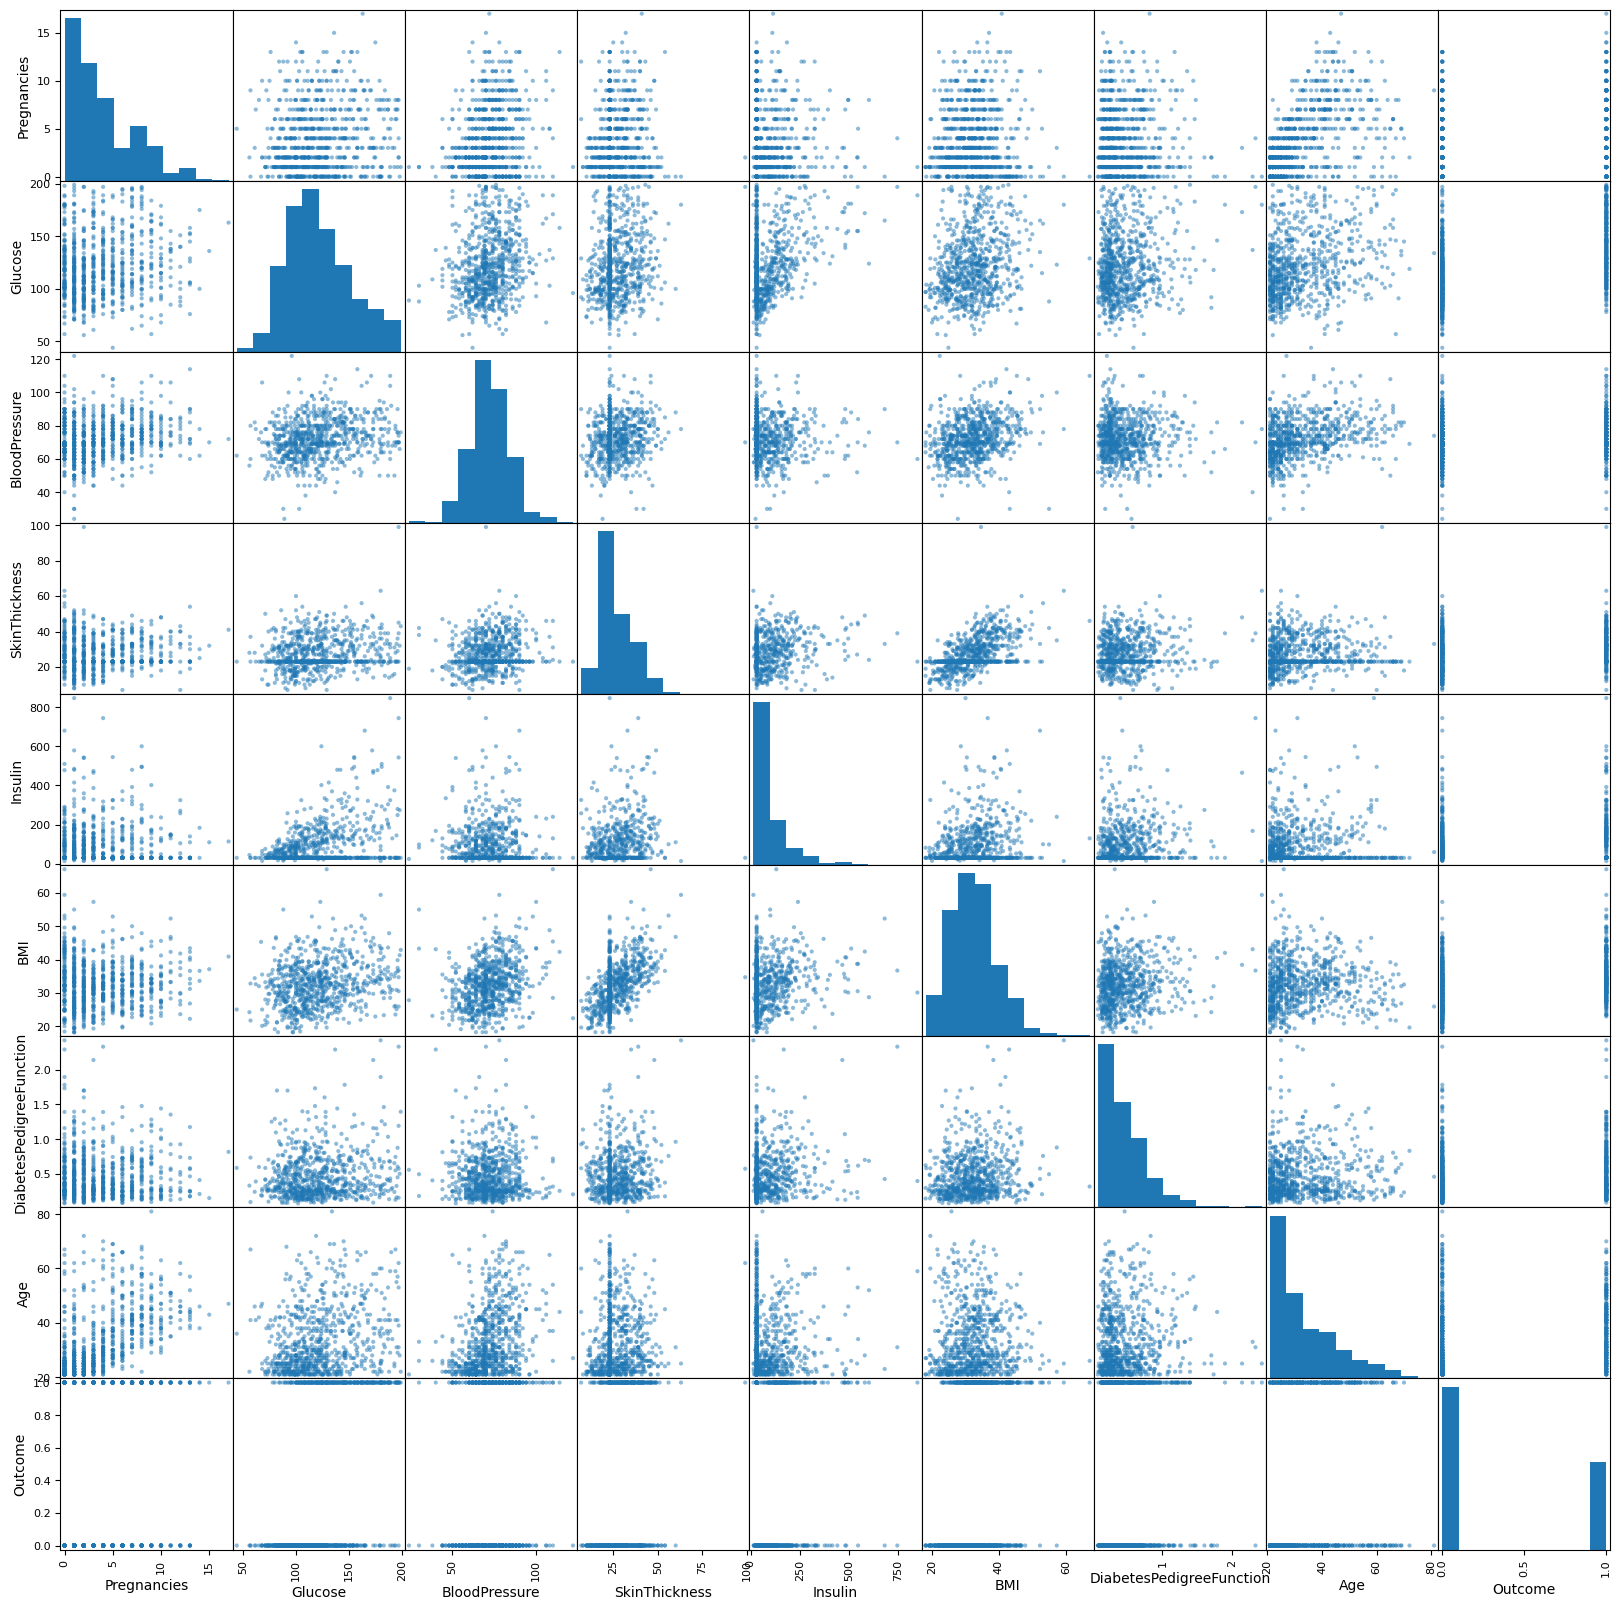

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset,figsize=(20,20))

##**Splitting the dataset in x and y**

In [16]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35,30.5,33.6,0.627,50
1,1,85.0,66.0,29,30.5,26.6,0.351,31
2,8,183.0,64.0,23,30.5,23.3,0.672,32
3,1,89.0,66.0,23,94.0,28.1,0.167,21
4,0,137.0,40.0,35,168.0,43.1,2.288,33


## Splitting the dataset into the Training set and Test set

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
print(x_train)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
603            7    150.0      78.000000             29    126.0  35.2   
118            4     97.0      60.000000             23     30.5  28.2   
247            0    165.0      90.000000             33    680.0  52.3   
157            1    109.0      56.000000             21    135.0  25.2   
468            8    120.0      69.105469             23     30.5  30.0   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0      76.000000             48    180.0  32.9   
192            7    159.0      66.000000             23     30.5  30.4   
629            4     94.0      65.000000             22     30.5  24.7   
559           11     85.0      74.000000             23     30.5  30.1   
684            5    136.0      82.000000             23     30.5  32.0   

     DiabetesPedigreeFunction  Age  
603                     0.692   54  
118                     0.443   22  


In [23]:
print(y_test)

661    1
122    0
113    0
14     1
529    0
      ..
476    1
482    0
230    1
527    0
380    0
Name: Outcome, Length: 154, dtype: int64


## Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [30]:
print(x_train)

[[ 0.90832902  0.93644016  0.45816047 ...  0.36863635  0.67740401
   1.69955804]
 [ 0.03644676 -0.81628595 -1.03864035 ... -0.63294341 -0.07049698
  -0.96569189]
 [-1.12606292  1.43249471  1.45602768 ...  2.81535261 -0.11855487
  -0.88240283]
 ...
 [ 0.03644676 -0.91549686 -0.62286235 ... -1.13373329 -0.95656442
  -1.04898095]
 [ 2.0708387  -1.2131296   0.12553806 ... -0.36108605 -0.50001442
   0.11706589]
 [ 0.32707418  0.4734559   0.79078287 ... -0.08922869  0.52121586
   2.94889395]]


## Training the Naive Bayes model on the Training set

In [26]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

## Predicting a new result

In [24]:
a = int(input("Enter Pregnancies: "))
b = int(input("Enter Glucose: "))
c = int(input("Enter Blood Pressure: "))
d = int(input("Enter Skin Thickness: "))
e = int(input("Enter insulin: "))
f = int(float(input("Enter BMI: ")))
g = int(float(input("Enter Diabetes Pedigree Function: ")))
h = int(input("Enter your age: "))

print("The result will be either in [0] or [1]\nWhere [0] --> Negative\n[1]--> Positive\nThe result is: ",
      classifier.predict([[a,b,c,d,e,f,g,h]]))


Enter Pregnancies: 10
Enter Glucose: 148
Enter Blood Pressure: 90
Enter Skin Thickness: 40
Enter insulin: 122
Enter BMI: 28.9
Enter Diabetes Pedigree Function: 0.666
Enter your age: 50
The result will be either in [0] or [1]
Where [0] --> Negative
[1]--> Positive
The result is:  [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


## Predicting the Test set results

In [27]:
y_pred = classifier.predict(x_test)

## Making the Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score
cf = confusion_matrix(y_test,y_pred)
print(cf)
accuracy_score(y_test,y_pred)

[[92 15]
 [19 28]]


0.7792207792207793

In [32]:
classifier.score(x_train,y_train)

0.744299674267101

In [33]:
classifier.score(x_test,y_test)

0.7792207792207793